#  Uvod

U ovom delu projekta prikazano je **poređenje različitih pristupa klasifikaciji email-ova** na problemu detekcije neželjenih poruka (*spam/ham*).
Cilj je bio da se uporedi performansa klasičnih metoda obrade teksta, kao što je **Bag-of-Words (BoW)** u kombinaciji sa **Naive Bayes** klasifikatorom, sa savremenim transformer modelima koji koriste **BERT arhitekturu** i njene varijante.

Dok BoW + NB pristup koristi statističke obrasce reči i bajesovu teoremu za odlučivanje o klasi, transformer modeli (*BERT, DistilBERT, RoBERTa*) uče kontekstualne reprezentacije teksta, čime bolje razumeju značenje rečenica, odnose između reči i suptilne semantičke razlike između legitimnih i spam poruka.

### Scenariji testiranja

- **Single dataset treniranje**
  Model je treniran i testiran na delovima istog skupa podataka (npr. *Enron dataset*).

- **Cross-dataset evaluacija**
  Model je treniran na jednom skupu (*Enron*), a testiran na drugom (*Venky*), kako bi se proverila generalizacija modela na nove, nepoznate podatke.

Ovaj notebook prikazuje uporedne rezultate po ključnim metrikama:

- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix


## Grafički prikaz; upoređivanje svih metrika


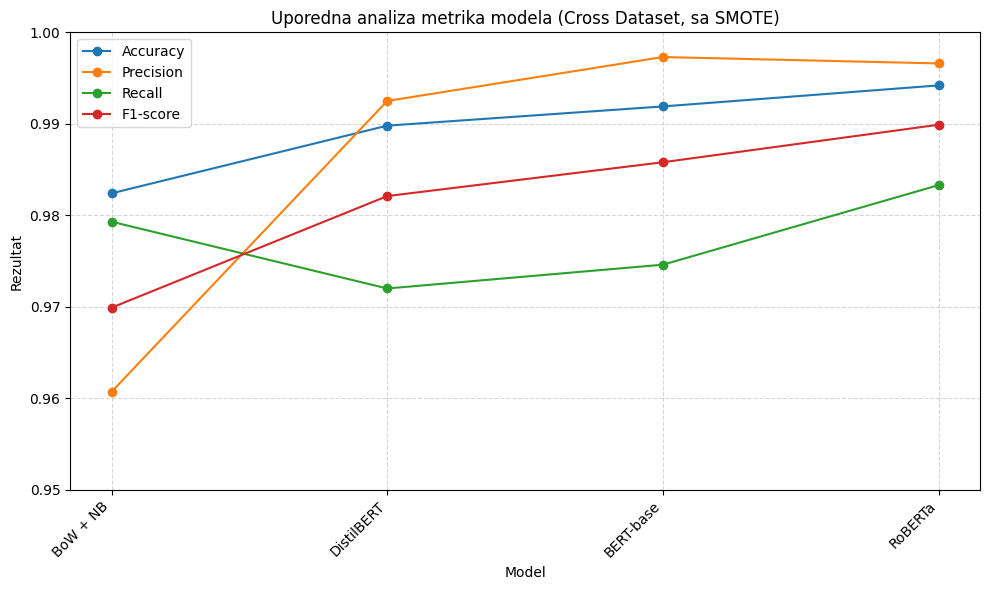

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "Model": ["BoW + NB", "DistilBERT", "BERT-base", "RoBERTa"],
    "Accuracy": [0.9824, 0.9898, 0.9919, 0.9942],
    "Precision": [0.9607, 0.9925, 0.9973, 0.9966],
    "Recall": [0.9793, 0.9720, 0.9746, 0.9833],
    "F1-score": [0.9699, 0.9821, 0.9858, 0.9899]
})

metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
df_plot = df.melt(id_vars="Model", value_vars=metrics, var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
for metric in metrics:
    subset = df_plot[df_plot["Metric"] == metric]
    plt.plot(subset["Model"], subset["Score"], marker="o", label=metric)

plt.xticks(rotation=45, ha="right")
plt.ylim(0.95, 1.0)
plt.title("Uporedna analiza metrika modela (Cross Dataset, sa SMOTE)")
plt.xlabel("Model")
plt.ylabel("Rezultat")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


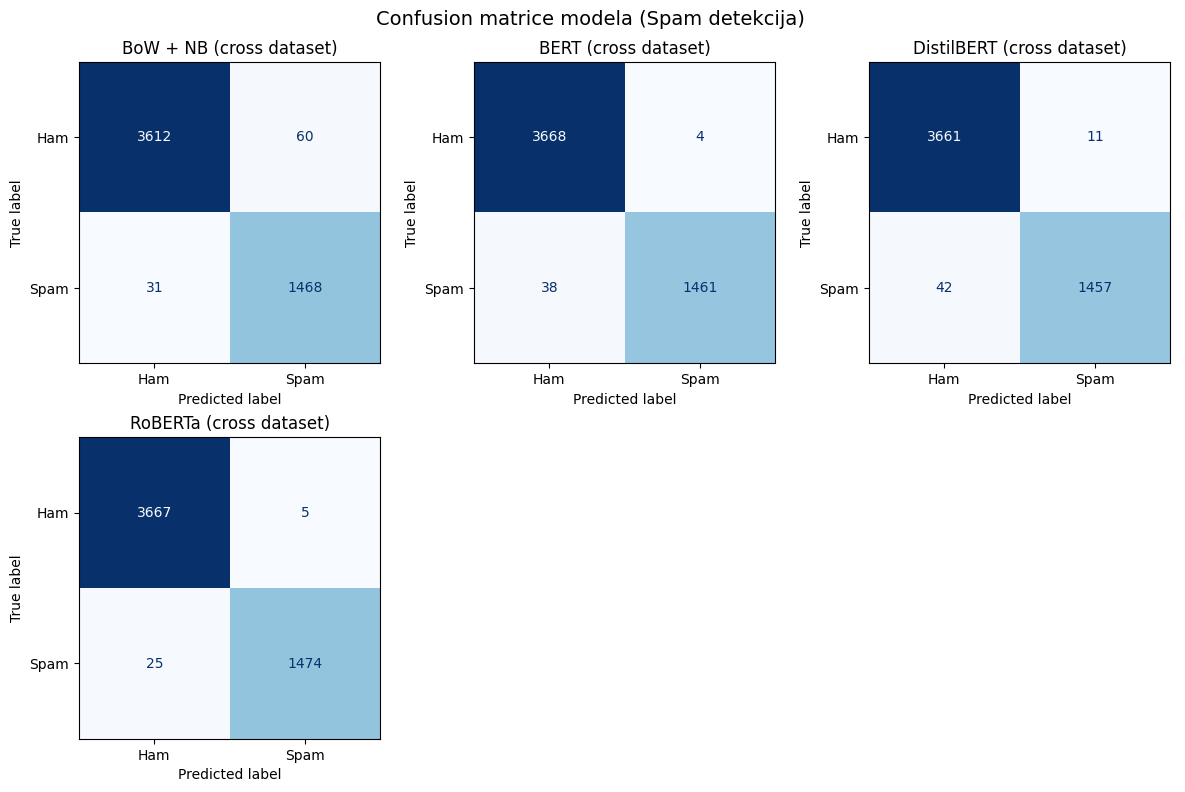

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

conf_matrices = {
    "BoW + NB (cross dataset)": np.array([[3612, 60],
                                          [31, 1468]]),
    "BERT (cross dataset)": np.array([[3668, 4],
                                      [38, 1461]]),
    "DistilBERT (cross dataset)": np.array([[3661, 11],
                                            [42, 1457]]),
    "RoBERTa (cross dataset)": np.array([[3667, 5],
                                         [25, 1474]]),
}

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for ax, (name, cm) in zip(axes, conf_matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(name)

for ax in axes[len(conf_matrices):]:
    ax.axis("off")

plt.suptitle("Confusion matrice modela (Spam detekcija)", fontsize=14)
plt.tight_layout()
plt.show()


## Zaključak

Rezultati pokazuju da transformer modeli  ostvaruju najviše performanse
u pogledu tačnosti i F1-score vrednosti, dok **klasični BoW + NB pristup** i dalje pokazuje solidne rezultate
uz znatno manju računarsku složenost.

U *cross-dataset* scenarijima, modeli zasnovani na BERT arhitekturi pokazuju **bolju generalizaciju**
u poređenju sa BoW + NB pristupom, koji nešto više gubi na preciznosti prilikom prelaska na novi skup podataka.

Ova analiza potvrđuje značaj kontekstualnog razumevanja teksta kod detekcije spama.
